# ECML 2024 Demonstration: Classification, Regression and Clustering with aeon

Required for this notebook:

`pip install aeon matplotlib seaborn torch`

## Time Series Classification

In [137]:
from aeon.classification.convolution_based import MultiRocketHydraClassifier
from aeon.classification.hybrid import HIVECOTEV2
from aeon.datasets import load_classification
from aeon.visualisation.series._collections import plot_collection_by_class
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [138]:
X_train, y_train = load_classification("ArrowHead", split="TRAIN")
X_test, y_test = load_classification("ArrowHead", split="TEST")
print(f"Train shape: {X_train.shape} {y_train.shape}")
print(f"Test shape: {X_test.shape} {y_test.shape}")

Train shape: (36, 1, 251) (36,)
Test shape: (175, 1, 251) (175,)


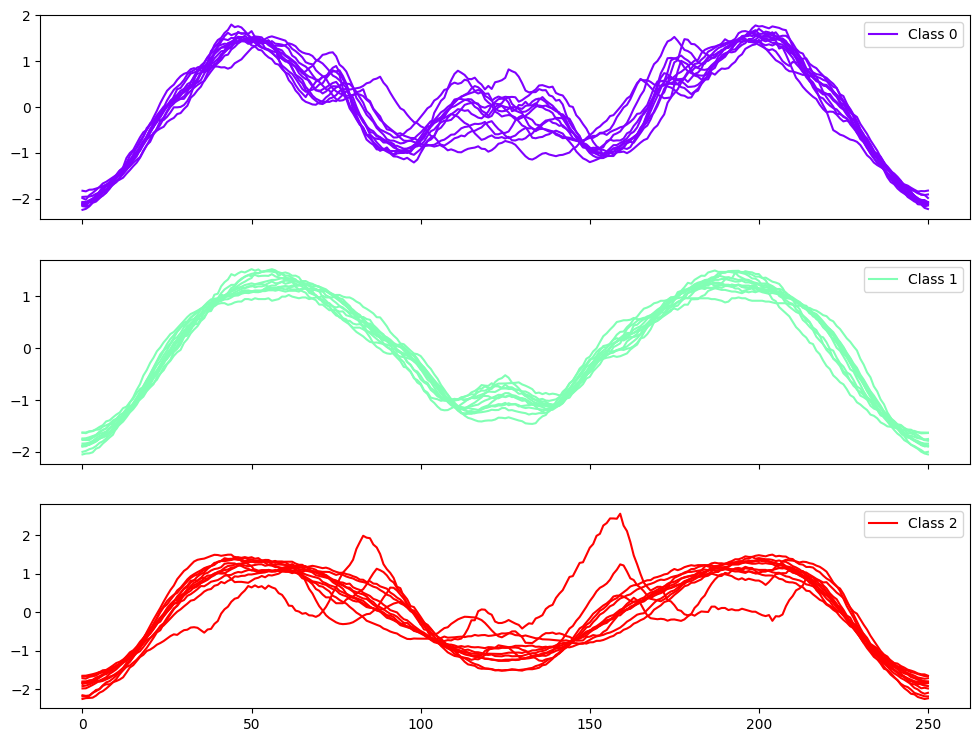

In [139]:
_, _ = plot_collection_by_class(X_train, y_train)

In [140]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train.squeeze(), y_train)
predictions = rf.predict(X_test.squeeze())
accuracy_score(y_test, predictions)

0.6971428571428572

In [141]:
mrh = MultiRocketHydraClassifier(random_state=0)
mrh.fit(X_train, y_train)
predictions = mrh.predict(X_test)
accuracy_score(y_test, predictions)

0.8628571428571429

In [142]:
hc2 = HIVECOTEV2(
    stc_params = {"n_shapelet_samples": 1000},
    drcif_params = {"n_estimators": 50},
    arsenal_params = {"num_kernels": 1000},
    tde_params = {
        "n_parameter_samples": 100,
        "max_ensemble_size": 25,
    },
    random_state=0,
)
hc2.fit(X_train, y_train)
predictions = hc2.predict(X_test)
accuracy_score(y_test, predictions)

0.8571428571428571

## Time Series Extrinsic Regression

In [143]:
from aeon.regression.interval_based import DrCIFRegressor
from aeon.regression.hybrid import RISTRegressor
from aeon.datasets import load_regression
from aeon.visualisation.series._collections import plot_series_collection
from aeon.visualisation.results._scatter import plot_scatter_predictions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [144]:
X_train, y_train = load_regression("NaturalGasPricesSentiment", split="TRAIN")
X_test, y_test = load_regression("NaturalGasPricesSentiment", split="TEST")
print(f"Train shape: {X_train.shape} {y_train.shape}")
print(f"Test shape: {X_test.shape} {y_test.shape}")

Train shape: (65, 1, 20) (65,)
Test shape: (28, 1, 20) (28,)


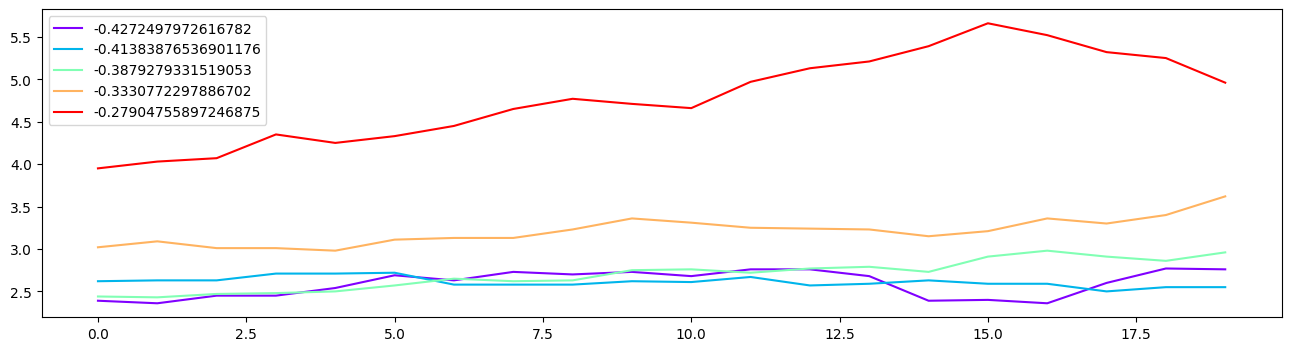

In [145]:
_, _ = plot_series_collection(X_train[:5], y_train[:5])

In [146]:
lr = LinearRegression()
lr.fit(X_train.squeeze(), y_train)
predictions = lr.predict(X_test.squeeze())
root_mean_squared_error(y_test, predictions)

0.3030006915286905

In [147]:
drcif = DrCIFRegressor(n_estimators=40, random_state=0)
drcif.fit(X_train, y_train)
predictions = drcif.predict(X_test)
root_mean_squared_error(y_test, predictions)

0.05386878355666217

In [148]:
rist = RISTRegressor(n_intervals=40, n_shapelets=150, random_state=0)
rist.fit(X_train, y_train)
predictions = rist.predict(X_test)
root_mean_squared_error(y_test, predictions)

0.05243933589682435

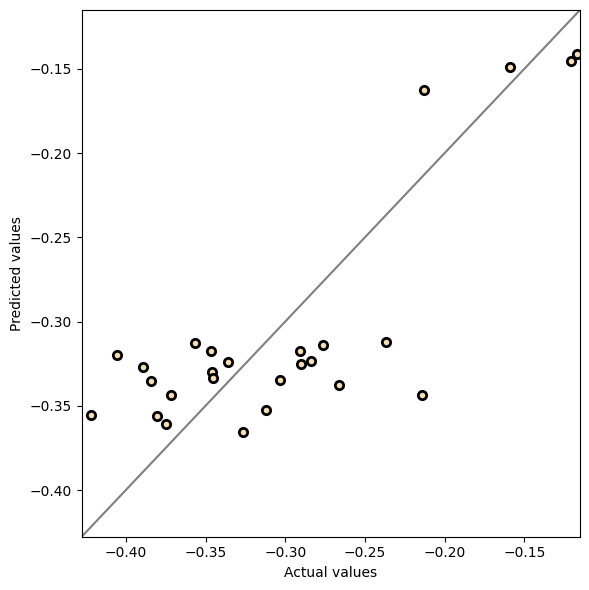

In [149]:
_, _ = plot_scatter_predictions(y_test, predictions)

## Time Series Clustering

In [150]:
from aeon.clustering import TimeSeriesKMedoids
from aeon.datasets import load_classification
from aeon.visualisation.series._collections import plot_collection_by_class
from aeon.visualisation.estimator._clustering import plot_cluster_algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score

In [151]:
X, y = load_classification("Trace")
print(f"Data shape: {X.shape} {y.shape}")

Data shape: (200, 1, 275) (200,)


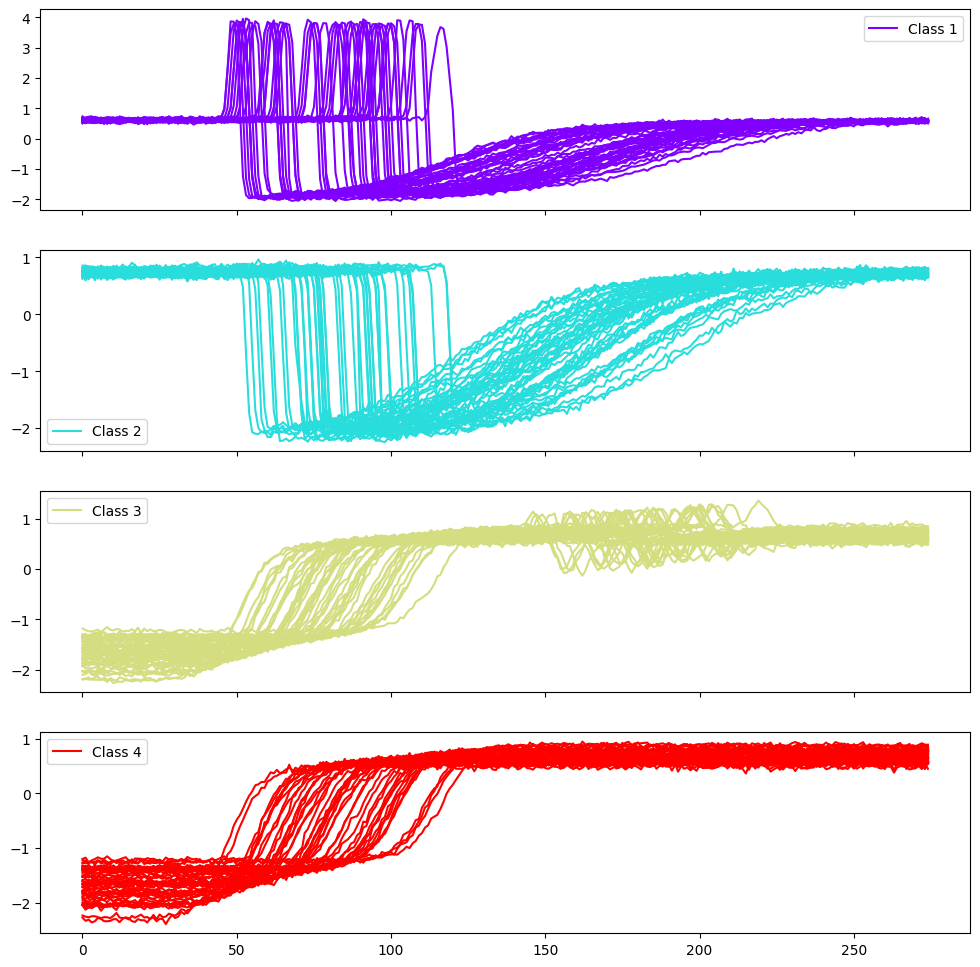

In [152]:
_, _ = plot_collection_by_class(X, y)

In [153]:
km = KMeans(n_clusters=4, random_state=0)
km.fit(X.squeeze())
rand_score(y, km.labels_)

0.7495477386934674

In [154]:
tskm = TimeSeriesKMedoids(distance="twe", n_clusters=4, random_state=0)
tskm.fit(X)
rand_score(y, tskm.labels_)

0.8745728643216081

<Figure size 500x1000 with 0 Axes>

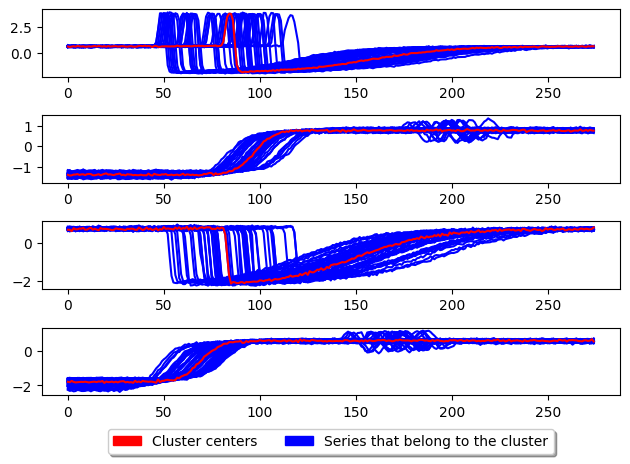

In [155]:
_, _ = plot_cluster_algorithm(tskm, X, 4)